# Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#print and preview the data
albumsalesdf = pd.read_csv(r"C:\Users\Celeste\Downloads\Lab Album Sales.csv")
albumsalesdf

,totalsales,AdvertBudget,AirplayTimes,AttractivenessScore
0,344,24,56,23
1,130,996,38,17
2,368,1454,42,14
3,276,1194,38,12
4,226,580,49,10
...,...,...,...,...
195,196,916,31,12
196,242,892,16,8
197,252,804,36,8
198,238,1508,19,16


In [4]:
# Get column names
albumsalesdf.columns

Index(['totalsales', 'AdvertBudget', 'AirplayTimes', 'AttractivenessScore'], dtype='object')

### Visualization

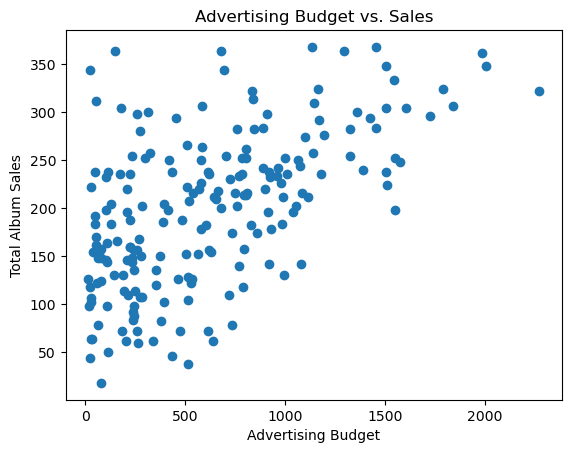

In [5]:
# Plot sales and advertising 
plt.scatter(albumsalesdf['AdvertBudget'], albumsalesdf['totalsales'])
plt.xlabel('Advertising Budget')
plt.ylabel('Total Album Sales')
plt.title('Advertising Budget vs. Sales')
plt.show()

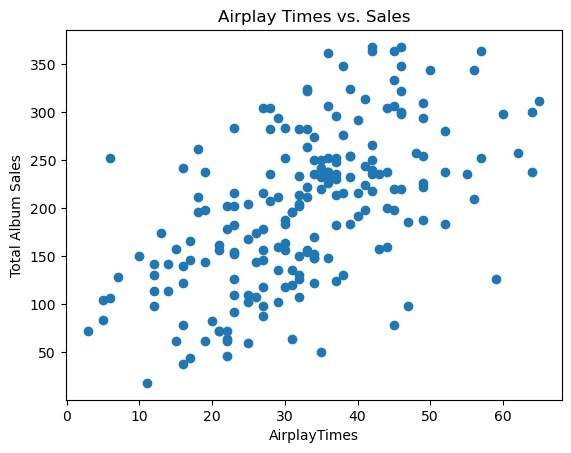

In [6]:
# Plot sales and airplay time
plt.scatter(albumsalesdf['AirplayTimes'], albumsalesdf['totalsales'])
plt.xlabel('AirplayTimes')
plt.ylabel('Total Album Sales')
plt.title('Airplay Times vs. Sales')
plt.show()

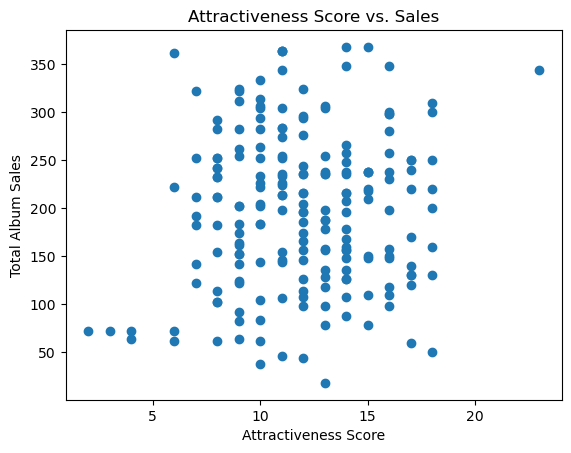

In [7]:
# Plot sales and attractiveness score
plt.scatter(albumsalesdf['AttractivenessScore'], albumsalesdf['totalsales'])
plt.xlabel('Attractiveness Score')
plt.ylabel('Total Album Sales')
plt.title('Attractiveness Score vs. Sales')
plt.show()

### Linear Regression

In [8]:
import statsmodels.formula.api as smf

In [9]:
# Single variable linear regression (sales vs adverts)
# Create a fitted model 
model1 = smf.ols(formula='totalsales ~ AdvertBudget', data=albumsalesdf).fit()
print("Linear regression p-values & summary")

#print model parameters, f-statistics, and p values)
print(model1.pvalues.to_string())
print(model1.summary())

Linear regression p-values & summary
Intercept       1.007819e-44
AdvertBudget    4.946499e-19
                            OLS Regression Results                            
Dep. Variable:             totalsales   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     98.04
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           4.95e-19
Time:                        12:19:32   Log-Likelihood:                -1120.8
No. Observations:                 200   AIC:                             2246.
Df Residuals:                     198   BIC:                             2252.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [10]:
# Print linear regression model params and estimate for $135,000 in adverts
print("linear regression model params")
print(model1.params.to_string())

linear regression model params
Intercept       139.593120
AdvertBudget      0.095517


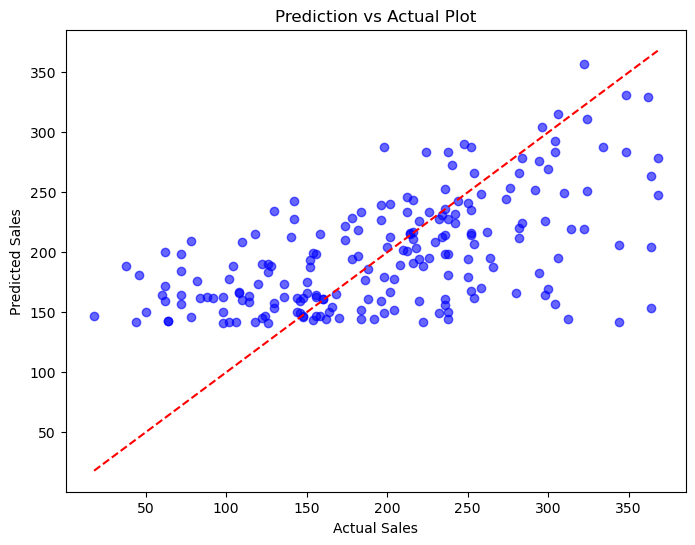

In [14]:
# Generate predictions based on the model
y_pred = model1.predict(albumsalesdf['AdvertBudget'])

# Create the Prediction vs Actual Plot
plt.figure(figsize=(8, 6))
plt.scatter(albumsalesdf['totalsales'], y_pred, color='blue', alpha=0.6)
plt.plot([min(albumsalesdf['totalsales']), max(albumsalesdf['totalsales'])], 
         [min(albumsalesdf['totalsales']), max(albumsalesdf['totalsales'])], 
         color='red', linestyle='--')  # Line of perfect prediction
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Prediction vs Actual Plot")
plt.show()

In [11]:
print("Estimate for $135,000 in advertising budget")
print(model1.params.iloc[0] + (model1.params.iloc[1] * 135000))

Estimate for $135,000 in advertising budget
13034.410330632654


### Multiple Regression

In [12]:
# Create a fitted model with all 3 features
model2 = smf.ols(formula='totalsales ~ AdvertBudget + AirplayTimes + AttractivenessScore', data=albumsalesdf).fit()
# Print the coefficients
print("Multi-variable linear regression p-values & summary")
print(model2.pvalues.to_string())
print(model2.summary())

Multi-variable linear regression p-values & summary
Intercept              2.148093e-02
AdvertBudget           2.096967e-25
AirplayTimes           3.332258e-24
AttractivenessScore    7.463833e-01
                            OLS Regression Results                            
Dep. Variable:             totalsales   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     105.2
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           1.27e-40
Time:                        12:19:38   Log-Likelihood:                -1065.0
No. Observations:                 200   AIC:                             2138.
Df Residuals:                     196   BIC:                             2151.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
              

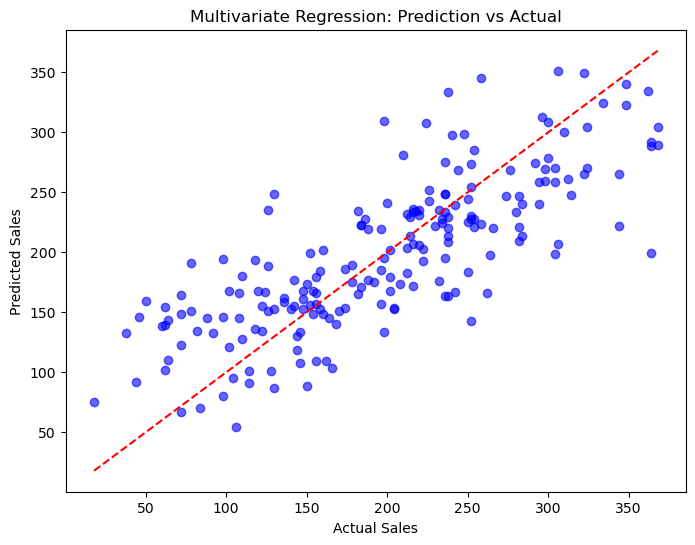

In [15]:
# Generate predictions based on the multivariate model
y_pred_multi = model2.predict(albumsalesdf[['AdvertBudget', 'AirplayTimes', 'AttractivenessScore']])

# Create the Prediction vs Actual Plot for Multivariate Regression
plt.figure(figsize=(8, 6))
plt.scatter(albumsalesdf['totalsales'], y_pred_multi, color='blue', alpha=0.6)
plt.plot([min(albumsalesdf['totalsales']), max(albumsalesdf['totalsales'])], 
         [min(albumsalesdf['totalsales']), max(albumsalesdf['totalsales'])], 
         color='red', linestyle='--')  # Line of perfect prediction
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Multivariate Regression: Prediction vs Actual")
plt.show()